# Loan Prediction Based on Customer Behavior

## Source and Link:
<p> The dataset belongs to a Hackathon organized by "Univ.AI"!! </p>

<b>[Loan Prediction Based on Customer Behavior](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior)</b>

## Problem Definition:
<p> The goal of an organization is to foresee potential customers who may default on their loans by using past behavior data of their customers. By doing so, they intend to estimate the likelihood of new customers becoming at risk or not. <br>
All the date were provided at the time of the loan application.
</p>

## Feature Description:


| Feature | Description | Data Type |
| :--------|:-------------|:-----------:|
| ID   | ID of the cutomer |  Numeric  |
| Income| Income of the cutomer|  Numeric     |
| Age|Age of the cutomer|    Numeric   |
| Experience| Professional experience of the cutomer in years|   Numeric     |
| Married/Single|Marital status of the cutomer|    String     |
| House_Ownership| Does the customer Own or rent or neither|   String        |
| Car_Ownership| Does the customer own a car|   String        |
| Profession| Job of the cutomer|    String       |
| CITY| City of residence |       String    |
| STATE|State of residence|      String     |
| current_job_years	| Years of experience in the current job |    Numeric       |
| current_house_years| Number of years in the current house	|    Numeric       |
| Risk_Flag| Defaulted on a loan or not in the past|       Numeric    |

## 1. The necessary Libraries

In [1]:
# libray for managing warnings
import warnings

# pandas and numpy for data manipulation & numerical computations
import pandas as pd
import numpy as np

# seaborn and matplotlip for plotting 
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libirary imports for preprocessing, modeling, and model eavluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# display plot in the same cell
%matplotlib inline

# display max df columns
pd.set_option('display.max_columns', None)

# setting the seaborn style
sns.set(style="darkgrid")

# ignore warnings
warnings.filterwarnings('ignore')

## 2. Load the data set

In [2]:
df = pd.read_csv('Loan_Data.csv')

In [3]:
# first 5 rows
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# last 5 rows
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


## 3. Data Checks
This section for checking the size of the data set, outliers, missing values, and duplicates.

In [5]:
# shape 
df.shape

(252000, 13)

In [6]:
# data types
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [7]:
# MISSING VALUES
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
# Check Duplicates
df.duplicated().sum()

0

In [9]:
# check outliers
def outliers(df):
    #  first and third quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    # IQR
    IQR = Q3 - Q1
    
    out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    
    return out

In [10]:
# total number of outliers in each features

total = []
for col in df.columns[[1,2,3,10,11]]:
    total.append(len(outliers(df[col])))


# data frame to display total number of outliers in each features

outlier_df = pd.DataFrame(
    data = {'Features' : df.columns[[1,2,3,10,11]], 
          'Total Outliers' : total}).set_index('Features')
outlier_df

,Total Outliers
Features,
Income,0
Age,0
Experience,0
CURRENT_JOB_YRS,0
CURRENT_HOUSE_YRS,0


### Insights:
* There are 252000 observation and 13 column.
* There are categorical features need to be mapped before modeling.
* The data doesn't cotain any missing values.
* The data doesn't cotain any outliers.
* The data doesn't cotain any duplicates.

## 4. EDA
This section is divide into to parts:
* Summary statistics
* Visualization

To illustrate the distributions, relationships, and patterns in the data as well as getting insights.

### 4.1 Summary statistics:

In [11]:
# summary stats
df[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


<b>Insights:</b>
* avg income of the appliacnts is almost 5,000,00 
* avg age of the applicants is almost 50 
* avg years of experience the applicants is 10 yrs
* avg job years of the applicants is almost 6 years
* avg current house years of the applicants is almost 12 yrs

### 4.2 Visualization

#### 4.2.1 Univariate analysis

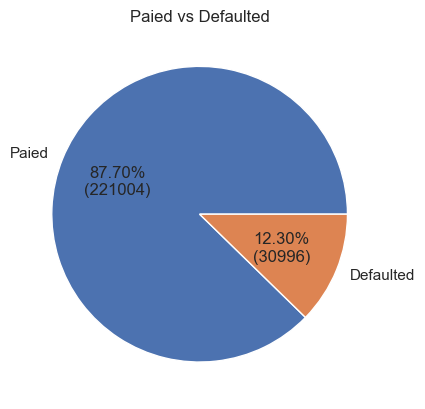

In [12]:
# count number of Defaulted and not
risk = df['Risk_Flag'].value_counts()

# visualize using pie chart
plt.pie(risk, labels = ["Paied","Defaulted"], autopct=lambda x:'{:.2f}%\n({:.0f})'.format(x, risk.sum()*x/100))
plt.title("Paied vs Defaulted")
plt.show()

<b> Insights: </b>
* Most of the applicates haven't been defaulted before as only 12.3% of the have been defaulted.

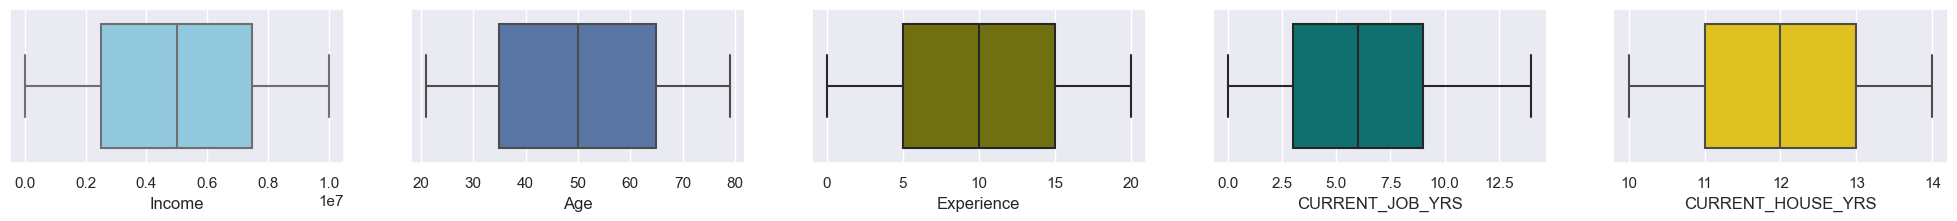

In [13]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,5, figsize=(25, 2))

# inti a number of box plots
sns.boxplot(data=df, x='Income', color="skyblue", ax=axs[0])
sns.boxplot(data=df, x='Age', ax=axs[1])
sns.boxplot(data=df, x='Experience', color="olive", ax=axs[2])
sns.boxplot(data=df, x='CURRENT_JOB_YRS', color="teal", ax=axs[3])
sns.boxplot(data=df, x='CURRENT_HOUSE_YRS', color="gold", ax=axs[4])

# Show the plot
plt.show()

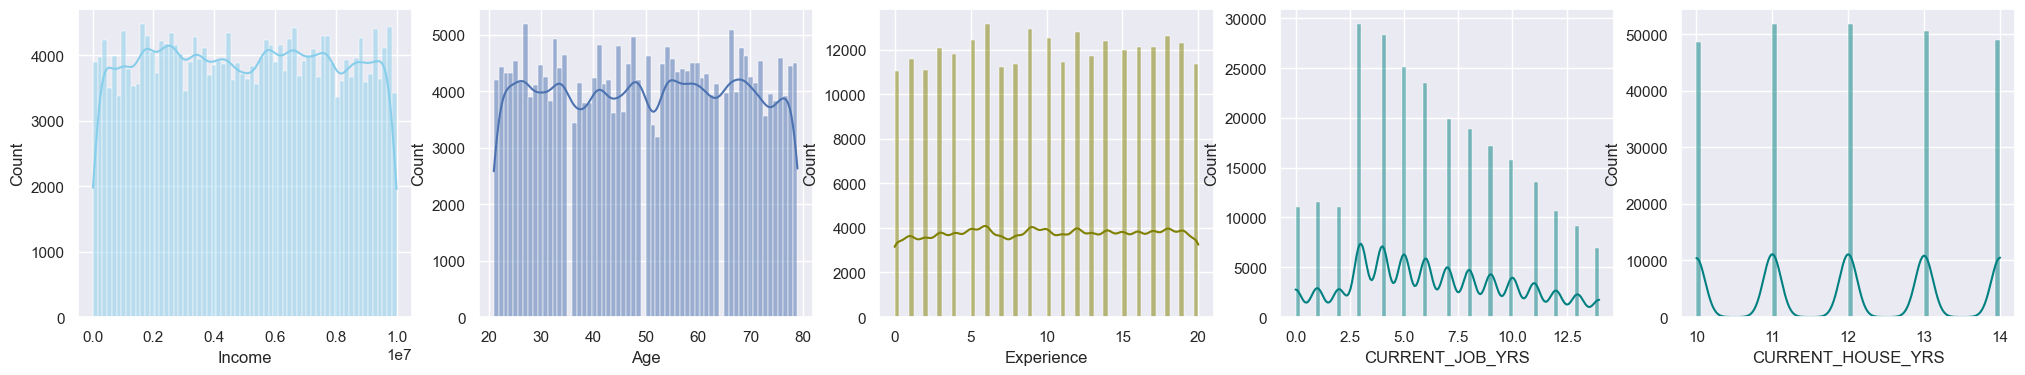

In [14]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,5, figsize=(25,4))

# inti a number of box plots
sns.histplot(data=df['Income'], kde=True, ax=axs[0], color="skyblue")
sns.histplot(data=df['Age'], kde=True, ax=axs[1])
sns.histplot(data=df['Experience'], kde=True, ax=axs[2], color="olive")
sns.histplot(data=df['CURRENT_JOB_YRS'], kde=True, ax=axs[3], color="teal")
sns.histplot(data=df['CURRENT_HOUSE_YRS'], kde=True, ax=axs[4], color="teal")

# Show the plot
plt.show()

<b>Insights:</b>
* There are no outliers.
* The distribution of the data is appx and Moderately skewed there is no need for transformation.

#### 4.2.2 Bivariate analysis

##### Risk by Income and Age

In [15]:
# split by avg income
df_2 = df.copy()
df_2['Income'] = df_2['Income'].map(lambda x:'>=5M' if x >= 5000000 else '<5M')

# split by avg age
df_2['Age'] = df_2['Age'].map(lambda x:'>=50' if x >= 50 else '<50')

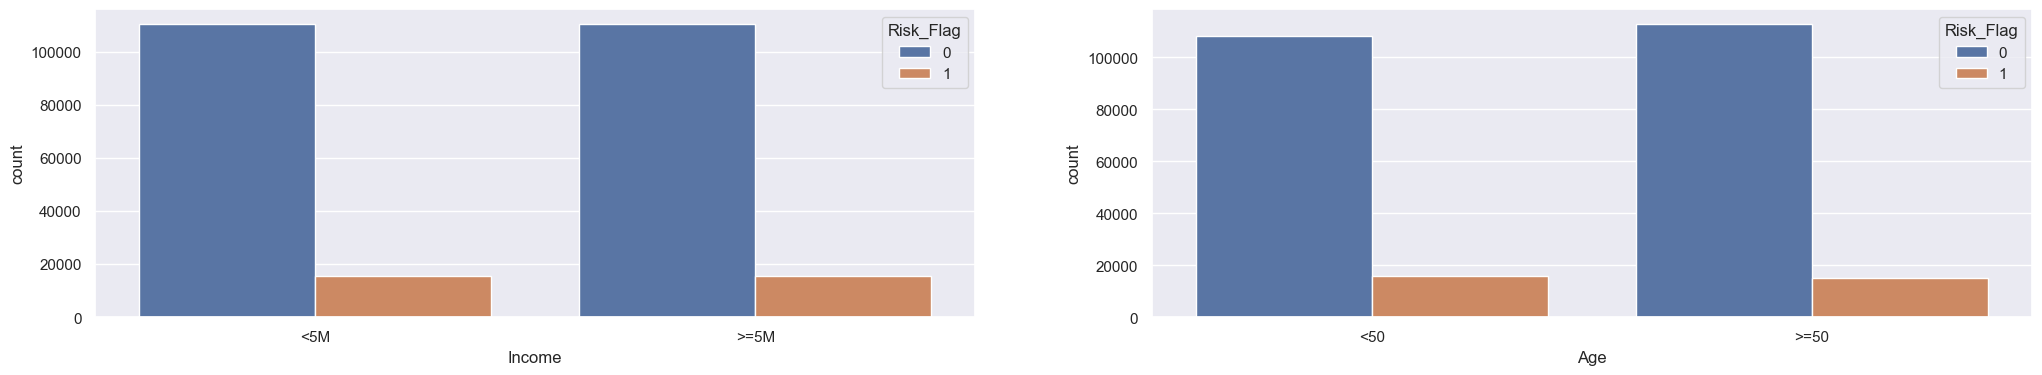

In [16]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(25, 4))

# inti a number of count plots
sns.countplot(data=df_2, x = "Income", hue="Risk_Flag", ax = axs[0])
sns.countplot(data=df_2, x = "Age", hue="Risk_Flag", ax = axs[1])

# Show the plot
plt.show()

<b>Insights:</b>
* Income and Age doesn't affect much the default risk as applicants above/below the avg have the same risk of being defaulted.

##### Risk by  Experience, Job, House years.

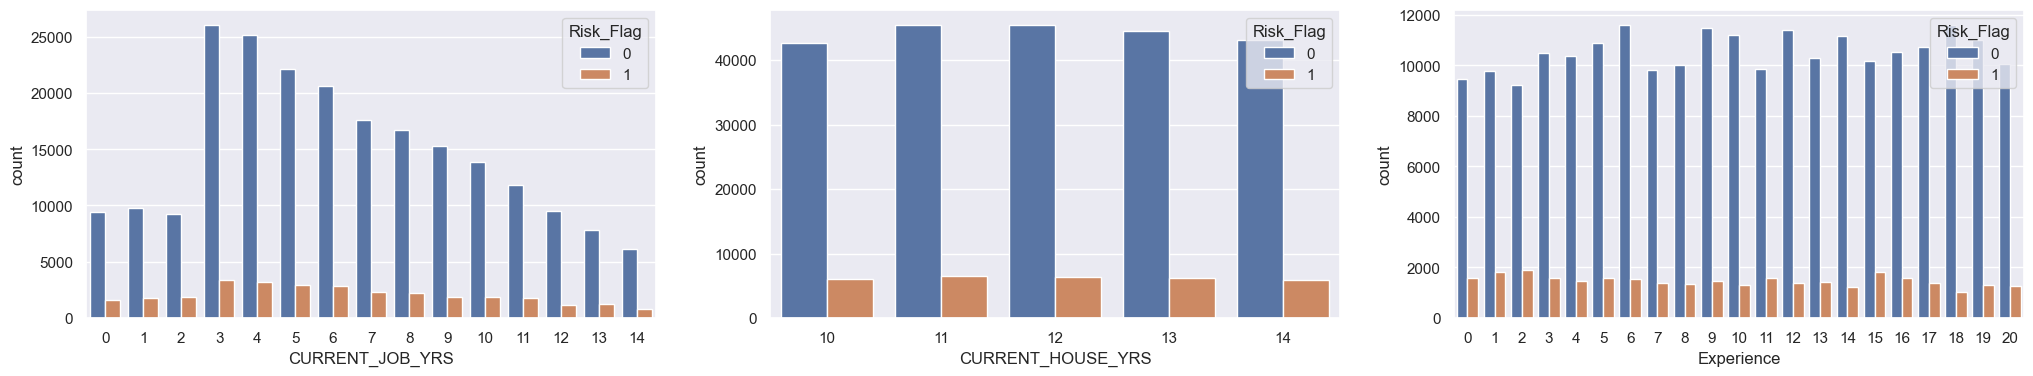

In [17]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,3, figsize=(25, 4))

# inti a number of count plots
sns.countplot(data=df, x = "CURRENT_JOB_YRS", hue="Risk_Flag", ax = axs[0])
sns.countplot(data=df, x = "CURRENT_HOUSE_YRS", hue="Risk_Flag", ax = axs[1])
sns.countplot(data=df, x = "Experience", hue="Risk_Flag", ax = axs[2])

# Show the plot
plt.show()

**Insights:**


* Applicates who sepnd more years in their jobs are less likely to default.
* Applicates who are less experieced are more likely to default.
* Applicates who live 10 yrs or more in the same house have low level of loan default.


##### Risk by Marital status, car, House ownership.

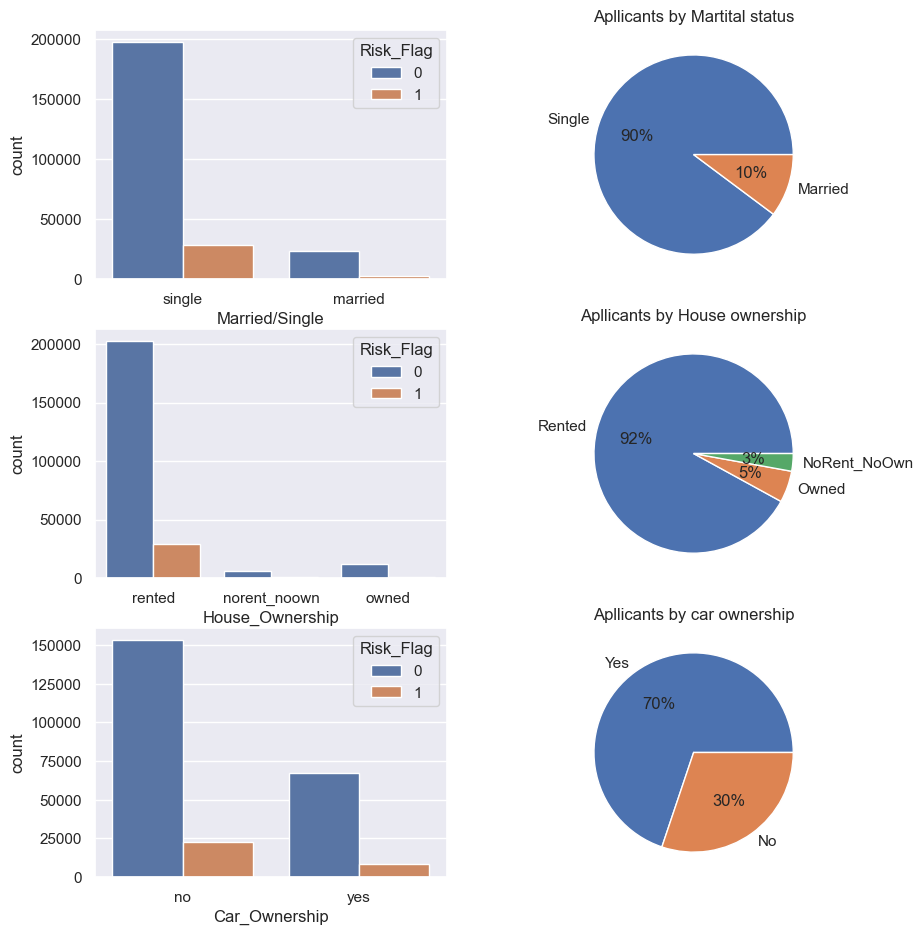

In [18]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(3,2, figsize=(10, 11))

# inti a number of count plots and pie plots
sns.countplot(data = df, x = 'Married/Single', hue = "Risk_Flag", ax = axs[0,0])
axs[0,1].pie(df['Married/Single'].value_counts(), labels = ["Single","Married"], autopct='%1.f%%')
axs[0,1].set_title('Apllicants by Martital status')

sns.countplot(data = df, x = 'House_Ownership', hue = "Risk_Flag", ax = axs[1,0])
axs[1,1].pie(df['House_Ownership'].value_counts(), labels = ["Rented","Owned","NoRent_NoOwn"], autopct='%1.f%%')
axs[1,1].set_title('Apllicants by House ownership')


sns.countplot(data = df, x = 'Car_Ownership',  hue = "Risk_Flag", ax = axs[2,0])
axs[2,1].pie(df['Car_Ownership'].value_counts(), labels = ["Yes","No"], autopct='%1.f%%')
axs[2,1].set_title('Apllicants by car ownership')

# Show the plot
plt.show()

**Insights:**

1.   Single customers ask more for loans and at higher risk to default.
2.   Customers who rent ask more for loans and at higher risk to default.
3.   Non-car owner customers ask less for loans but at higher risk to default.



##### Risk by Profession, City, State.

In [19]:
len(df['Profession'].unique())

51

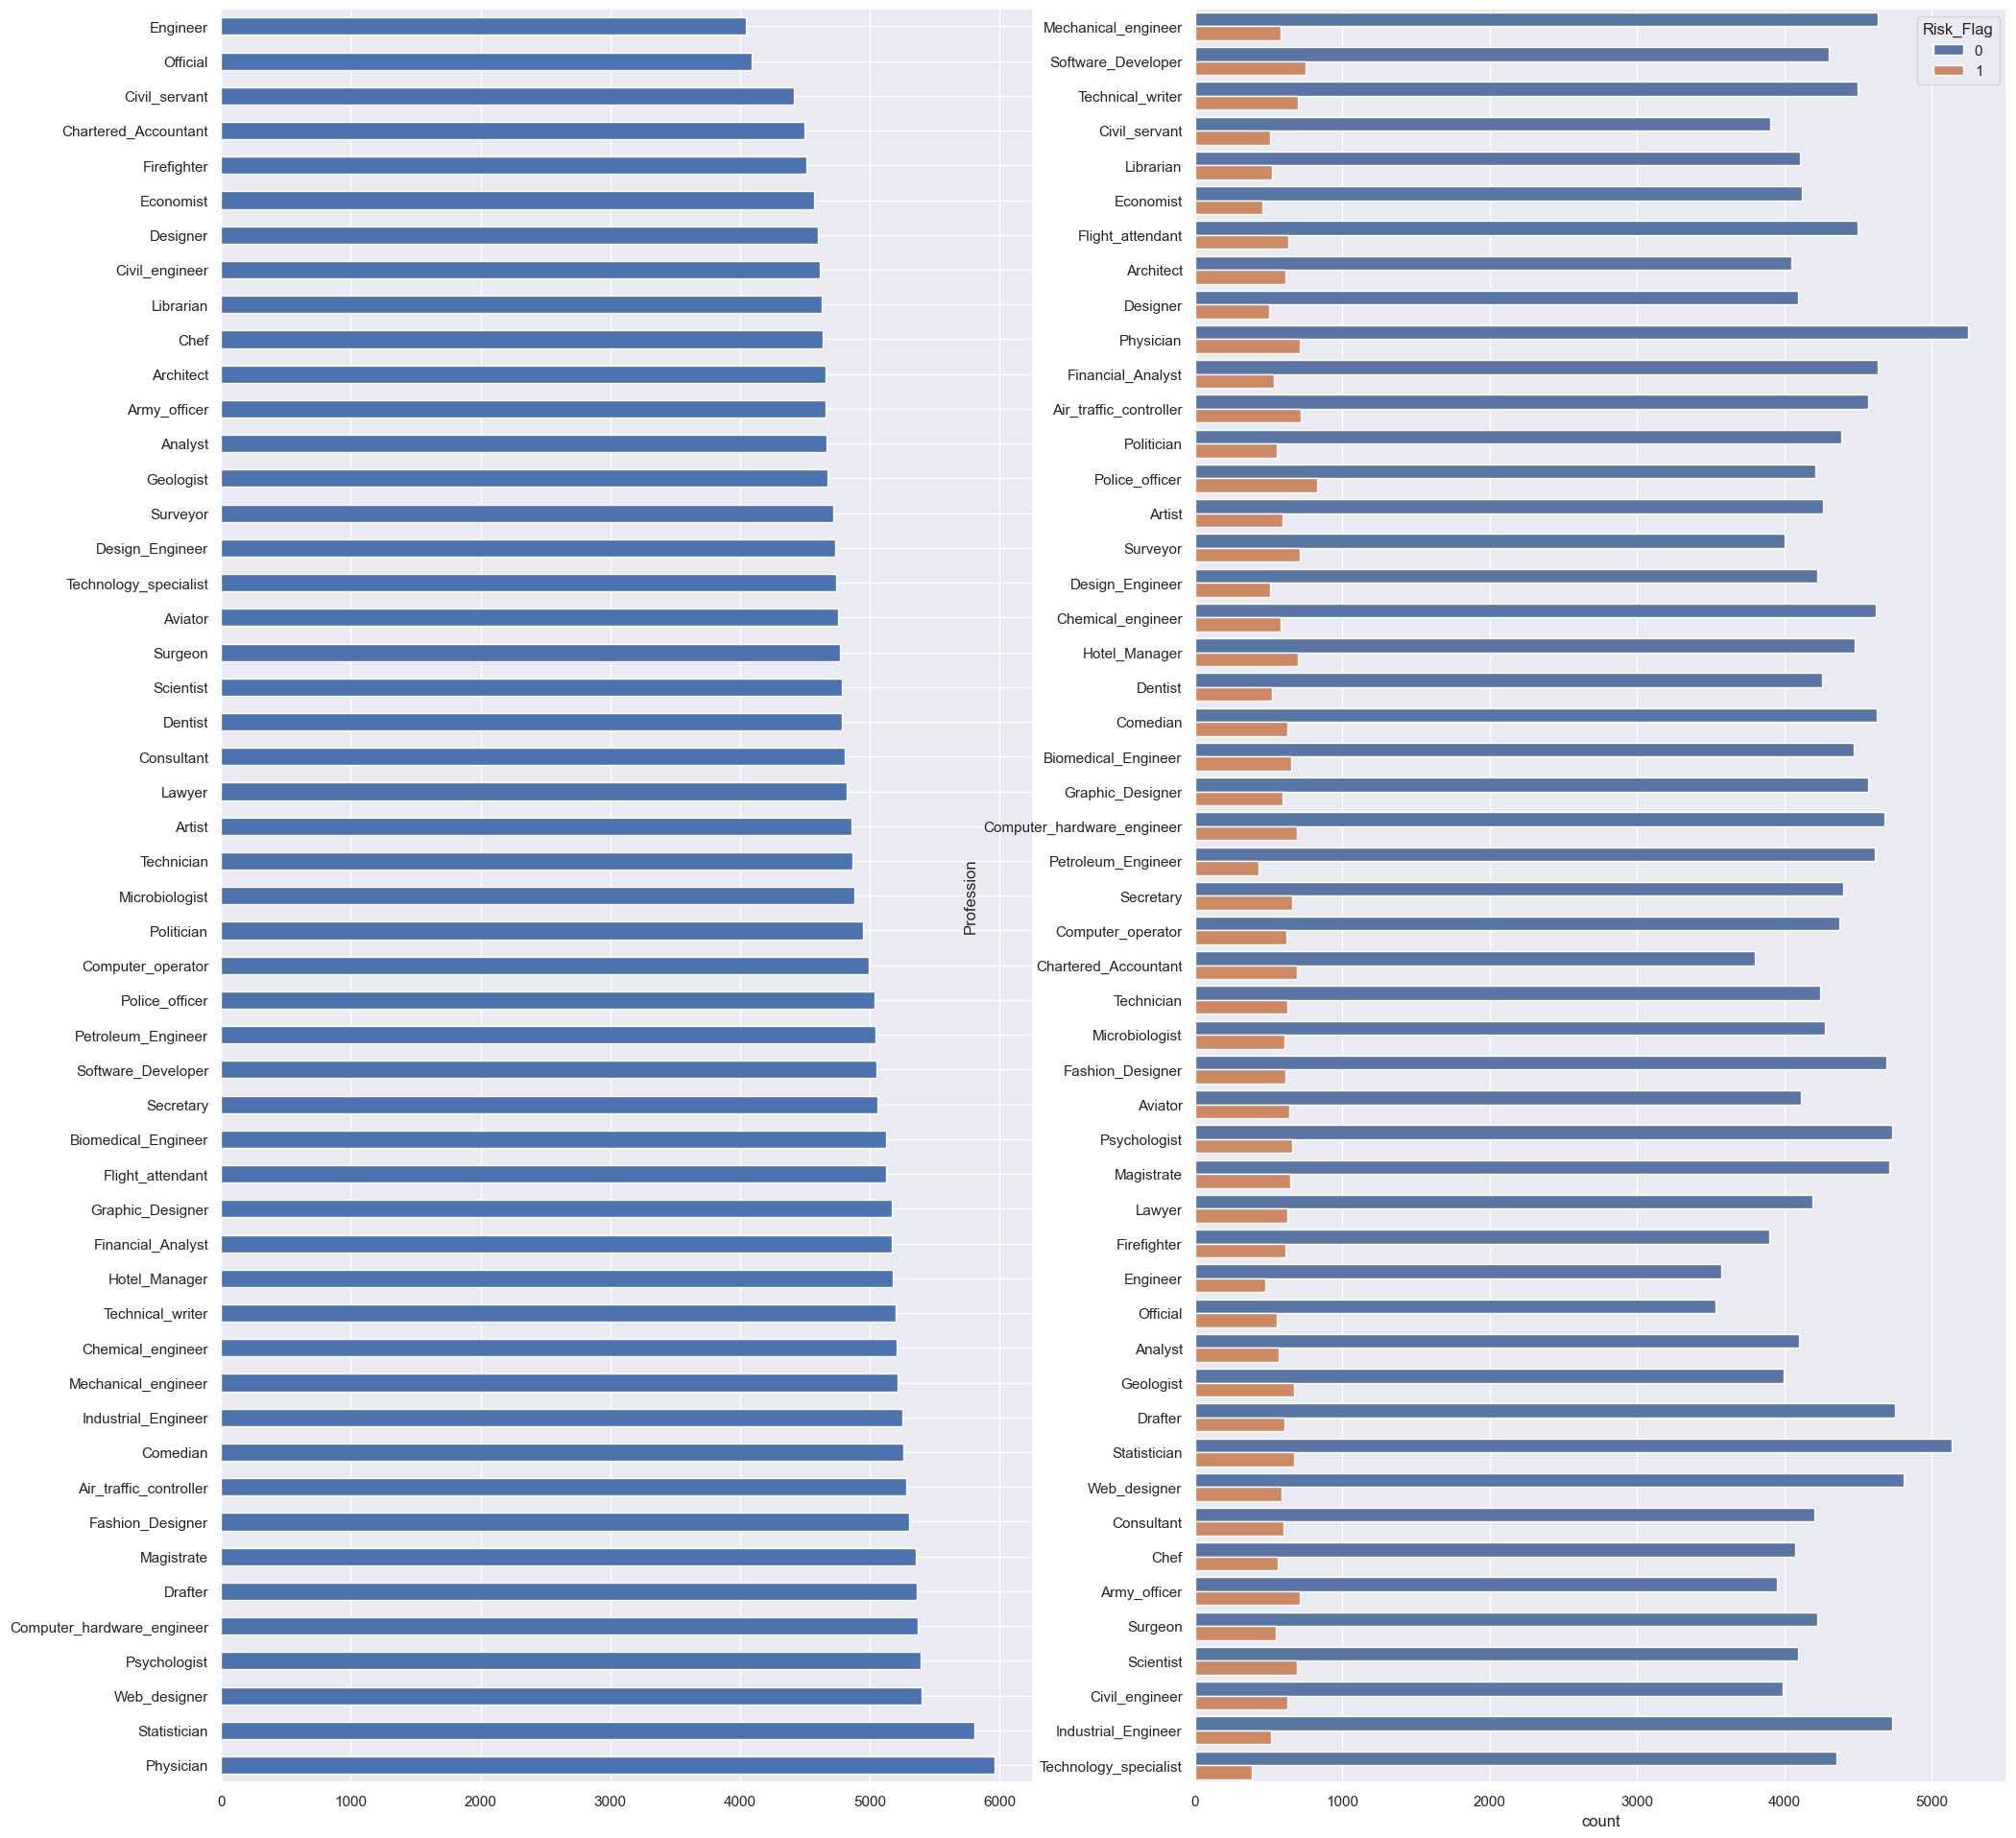

In [20]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(24, 24))

# inti a number of count plots and barPlot
df['Profession'].value_counts().plot(kind='barh',ax=axs[0])
sns.countplot(y="Profession", data=df, hue='Risk_Flag',ax = axs[1])

# Show the plot
plt.show()

In [21]:
pd.crosstab(df['Profession'], df['Risk_Flag'], margins=True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Police_officer,4209,826,5035
Software_Developer,4303,750,5053
Air_traffic_controller,4566,715,5281
Surveyor,4000,714,4714


In [22]:
pd.crosstab(df['Profession'], df['Risk_Flag'], margins=True).sort_values(by=0, ascending=False).head()

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Physician,5247,710,5957
Statistician,5135,671,5806
Web_designer,4808,589,5397
Drafter,4754,605,5359


**Insight:**

* There are 51 Profession.
* Physicians are the most to get loans.
* Police officers are the most to default.



In [23]:
len(df['STATE'].unique())

29

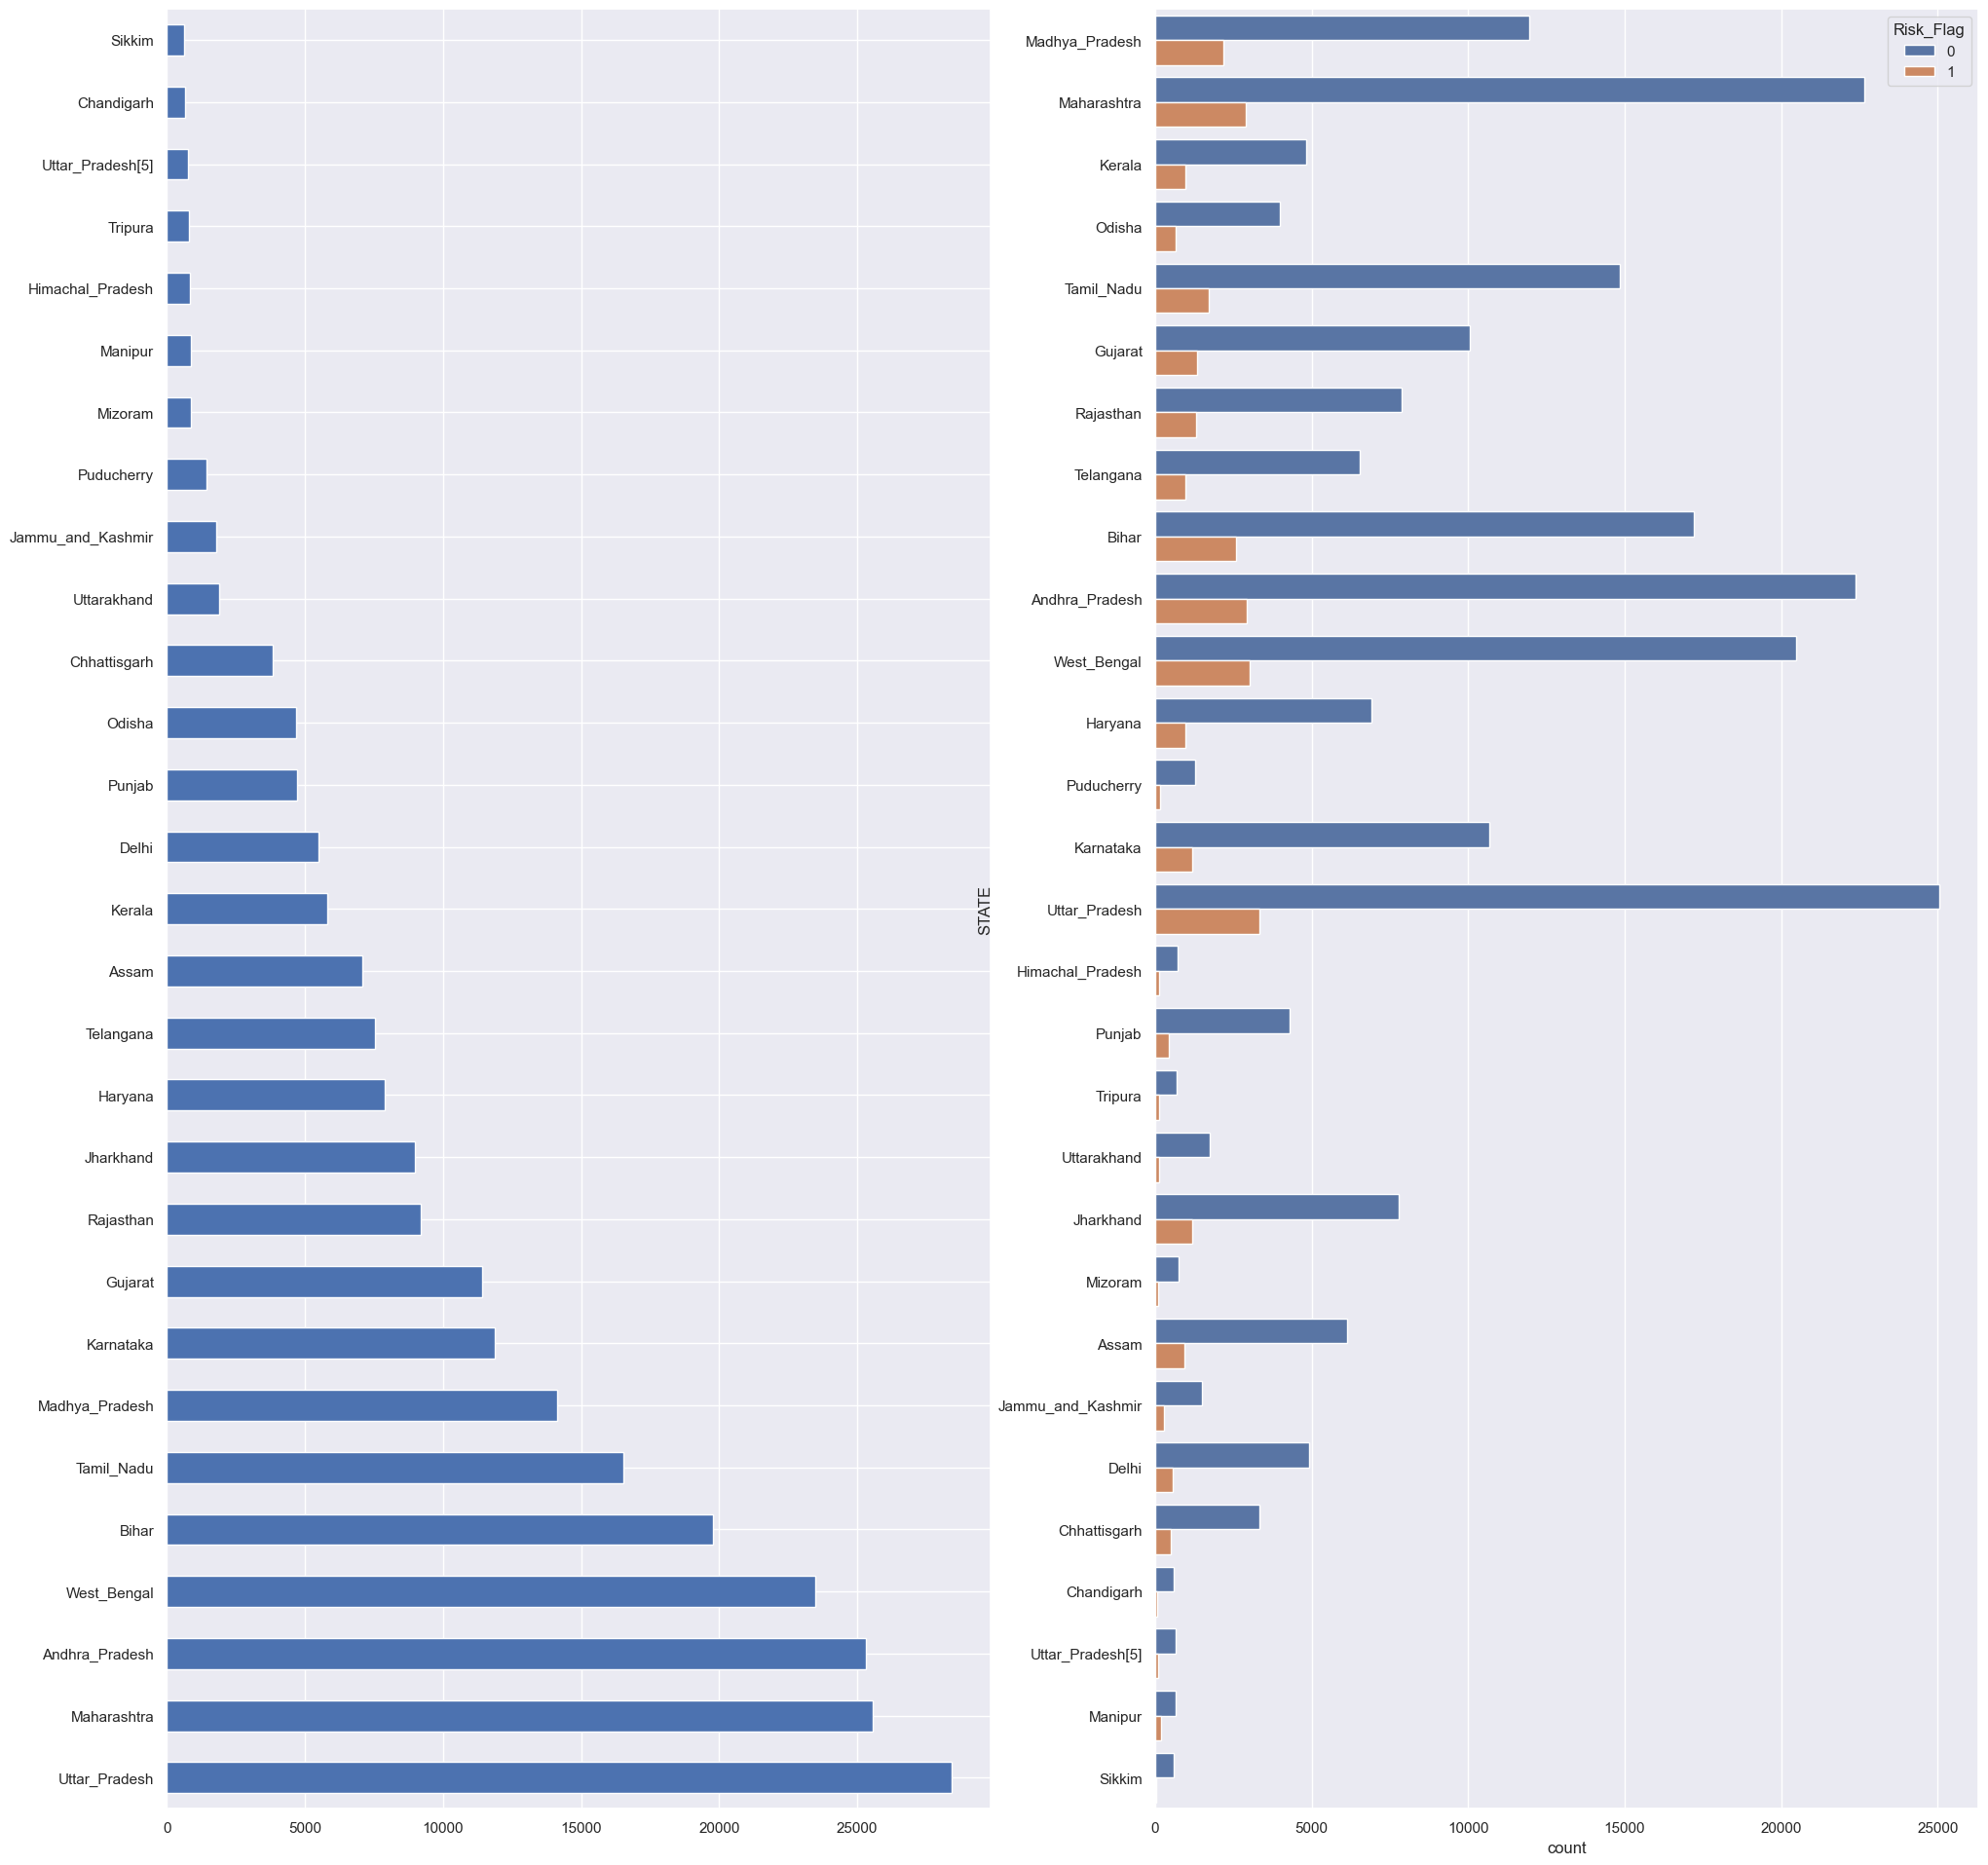

In [24]:
# Setting the figure size and number of subplots
fig, axs = plt.subplots(1,2, figsize=(24, 24))

# inti a number of count plots and barPlot
df['STATE'].value_counts().plot(kind='barh',ax=axs[0])
sns.countplot(y="STATE", data=df, hue='Risk_Flag',ax = axs[1])

# Show the plot
plt.show()

In [25]:
pd.crosstab(df['STATE'], df['Risk_Flag'], margins=True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
STATE,,,
All,221004,30996,252000
Uttar_Pradesh,25057,3343,28400
West_Bengal,20474,3009,23483
Andhra_Pradesh,22362,2935,25297
Maharashtra,22667,2895,25562


In [26]:
pd.crosstab(df['STATE'], df['Risk_Flag'], margins=True).sort_values(by=0, ascending=False).head()

Risk_Flag,0,1,All
STATE,,,
All,221004,30996,252000
Uttar_Pradesh,25057,3343,28400
Maharashtra,22667,2895,25562
Andhra_Pradesh,22362,2935,25297
West_Bengal,20474,3009,23483


<b> Insights: </b>
* The applicants come from 29 state.
* customers of **Uttar_Pradesh** are the most totake loans and default.

In [27]:
len(df['CITY'].unique())

317

In [28]:
pd.crosstab(df['CITY'], df['Risk_Flag'], margins=True).sort_values(by=0, ascending=False).head()

Risk_Flag,0,1,All
CITY,,,
All,221004,30996,252000
Vijayanagaram,1110,149,1259
Saharsa[29],1067,113,1180
Bulandshahr,1061,124,1185
Bhopal,1042,166,1208


In [29]:
pd.crosstab(df['CITY'], df['Risk_Flag'], margins=True).sort_values(by=1, ascending=False).head()

Risk_Flag,0,1,All
CITY,,,
All,221004,30996,252000
Kochi,718,243,961
Satna,796,232,1028
Buxar[37],757,228,985
Srinagar,920,216,1136


**Insights:**

* There are 317 the applicants live in.
* Customers of Kochi city the most to take loans
* Customers of Vijayanagaram city the most to default loans



##### Realtionship between the variables.

In [30]:
# drop Id
df_2 = df_2.drop(['Id'],axis=1)

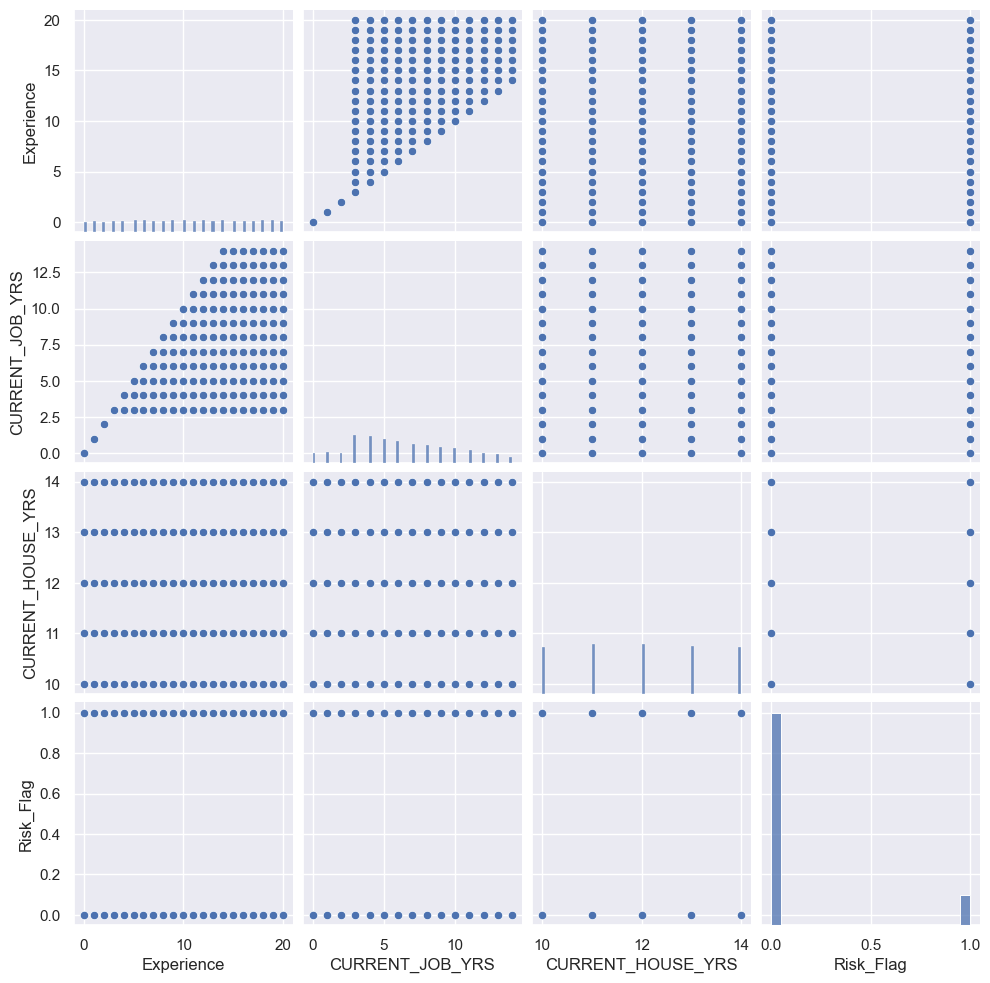

In [31]:
# pair plot
sns.pairplot(df_2)

# show the plt
plt.show()

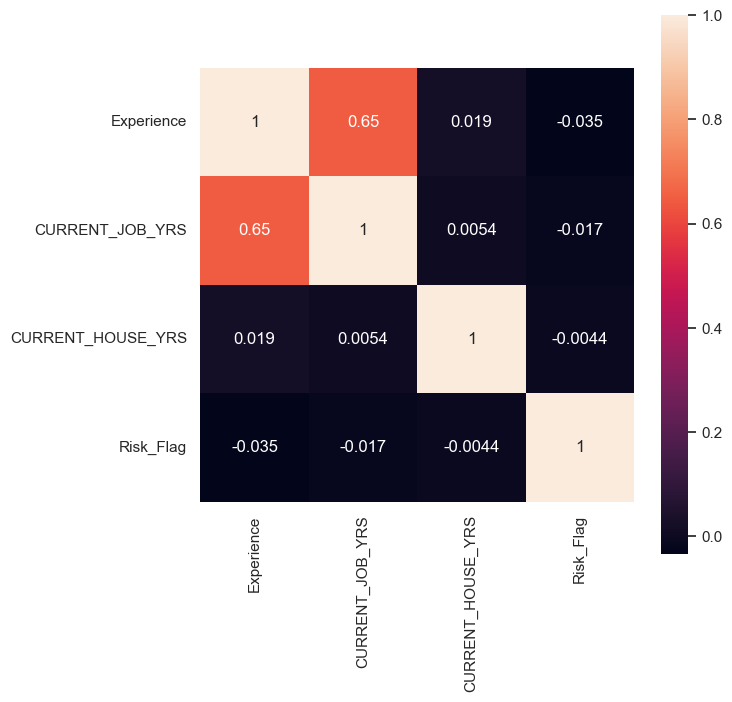

In [32]:
# calculate the correlation among the variables
corr = df_2.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(7, 7))

# Create a heatmap using Seaborn
sns.heatmap(corr, annot=True, square=True)

# Show the plot
plt.show()

<b>Insights:</b>
* There is a hight correlation between Experience and CURRENT_JOB_YRS one of them msut be dropped before modeling.

## 5. Preprocessing

### 5.1 Dealing with highly correlated featuers

In [33]:
# drop Experience
df_2 = df_2.drop(['Experience'],axis=1)
df_2

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,<5M,<50,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,>=5M,<50,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,<5M,>=50,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,>=5M,<50,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,>=5M,<50,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,>=5M,<50,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,<5M,<50,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,<5M,<50,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,>=5M,<50,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### 5.2 Feature Encoding

In [34]:
# label encoding
features = ['Income', 'Age', 'Married/Single', 'Car_Ownership' ,'House_Ownership', 'Profession', 'CITY', 'STATE']

lable = LabelEncoder()

for feature in features:
    df_2[feature] = lable.fit_transform(df_2[feature])
    
df_2

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0,0,1,2,0,33,251,13,3,13,0
1,1,0,1,2,0,43,227,14,9,13,0
2,0,1,0,2,0,47,8,12,4,10,0
3,1,0,1,2,1,43,54,17,2,12,1
4,1,0,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,1,0,1,2,0,45,162,28,6,11,0
251996,0,0,1,2,0,3,251,13,6,11,0
251997,0,0,1,2,0,17,144,14,7,12,0
251998,1,0,1,2,0,27,233,18,0,10,0


### 5.3 Feature Scaling

In [35]:
# min-max scaling
scaler = MinMaxScaler()
df_2[df_2.columns] = scaler.fit_transform(df_2[df_2.columns])
df_2

,Income,Age,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.0,0.0,1.0,1.0,0.0,0.66,0.794304,0.464286,0.214286,0.75,0.0
1,1.0,0.0,1.0,1.0,0.0,0.86,0.718354,0.500000,0.642857,0.75,0.0
2,0.0,1.0,0.0,1.0,0.0,0.94,0.025316,0.428571,0.285714,0.00,0.0
3,1.0,0.0,1.0,1.0,1.0,0.86,0.170886,0.607143,0.142857,0.50,1.0
4,1.0,0.0,1.0,1.0,0.0,0.22,0.936709,0.785714,0.214286,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...
251995,1.0,0.0,1.0,1.0,0.0,0.90,0.512658,1.000000,0.428571,0.25,0.0
251996,0.0,0.0,1.0,1.0,0.0,0.06,0.794304,0.464286,0.428571,0.25,0.0
251997,0.0,0.0,1.0,1.0,0.0,0.34,0.455696,0.500000,0.500000,0.50,0.0
251998,1.0,0.0,1.0,1.0,0.0,0.54,0.737342,0.642857,0.000000,0.00,0.0


## 6. Modelling

### 6.1 Data Spliting

In [36]:
indep_vars = df_2.loc[:, df_2.columns != 'Risk_Flag']
target_var = df_2['Risk_Flag']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(indep_vars, target_var, test_size = 0.2, random_state = 0)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 201600
Test size: 50400


### 6.2 Logistic Regression Model

In [38]:
weights = {0:1, 1:6.9}
model = LogisticRegression(class_weight=weights)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

### 6.3 Model Evaluation 

In [39]:
model_acc = (accuracy_score(prediction, y_test))*100
model_prec = precision_score(y_test, prediction)
model_rec = recall_score(y_test, prediction)
model_f1 = f1_score(y_test, prediction)

In [40]:
ev = pd.DataFrame({'Metric':['Accurracy','F1-Score','Precision'],
             'Value':[model_acc,model_f1,model_prec]}).set_index('Metric')
ev

,Value
Metric,
Accurracy,53.670635
F1-Score,0.213222
Precision,0.134427


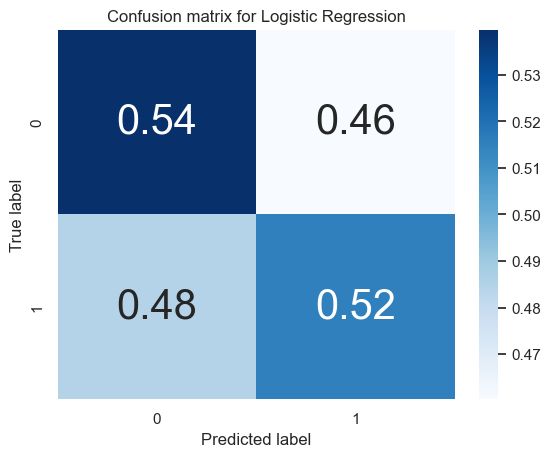

In [41]:
cm = confusion_matrix(y_test, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic Regression')
plt.show()